# HW1 due 5p Fri Oct 16 2020

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.

You are welcome to use analytical and numerical computational tools; if you do, include the **commented** sourcecode in your submission (e.g. the .ipynb file).

You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .ipynb file).

**Important:** before you do any work in the Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.

**Also important:** To produce a .pdf for submission to Canvas, click "File -> Print" (or press Ctrl/Cmd + P), and choose "Save to PDF" or "Microsoft Print to PDF" as your printer.


# 0. [preferred name]; [preferred pronouns]

a. Approximately how many hours did you spend on this assignment?

b. Were there specific problems that took much longer than others?

c. What class meeting(s) did you participate in this week?

d. What timezone(s) were you working in this week?

# 1. control systems

***Purpose:*** apply control systems concepts and terminology in real-world examples and applications.

Read Chapter 1 of the Astrom / Murray v2 textbook [[AMv2]](http://www.cds.caltech.edu/~murray/amwiki/index.php/Second_Edition), and report your solutions to Exercises 1, 2, 3, and 7 from Chapter 1.




# 2. proportional-integral control

This problem considers the following standard negative feedback block diagram.

![negative feedback block diagram](http://faculty.washington.edu/sburden/447/447-hw1-feedback.png)

***Purpose:*** you will analyze and synthesize a ***proportional-integral*** controller
$$ C(s) = k_P + k_I/s \iff u(t) = k_P e(t) + k_I \int_0^t e(\tau) d\tau $$ 
for the purpose of ***reference tracking*** (*not* disturbance rejection, which we covered in lecture) in the presence of ***unmodeled dynamics***.

first-order process
--

First, you will apply the proportional-integral controller to a ***first-order*** process model $P(s) = b / (s + a)$.

a. Determine the transfer function $G_{yr}$; simplify your formula until $G_{yr}$ is a rational function.  (***Note:***  we focused on $G_{yv}$ in lecture, not $G_{yr}$; however, we did derive the general formula for $G_{yr}$, which you can use to solve this problem.)

b. How does $G_{yr}$ change if the process gain increases by $10\%$ (i.e. what happens if you replace $P$ by $1.1\cdot P$)?  (***Hint:*** the change isn't $10\%$ -- this demonstrates that feedback can reduce the effect of model uncertainty.)

c. Evaluate $G_{yr}(0)$. What does this value imply about ***asymptotic reference tracking***, i.e. if the reference is constant, $r(t) = r_0$, how does $\lim_{t\rightarrow\infty} y(t)$ relate to $r_0$ (assuming the system is stable so $\lim_{t\rightarrow\infty} y(t)$ always exists)?   (***Note:*** $G_{yr}(0)$ is termed the ***static gain***)

second-order process
---
Now consider the ***second-order*** process model $P(s) = \frac{b}{s^2 + a_1 s + a_2}$.

d. Determine the degree of the numerator and denominator polynomials of $P$ and $C$. (***Hint:*** you need to simplify $C$ until it is a ***rational function***, that is, a ratio of two polynomials.)

e. Determine the degree of the numerator and denominator polynomials of the closed-loop transfer function $G_{yr}$.  (***Hint:*** you need to simplify $G_{yr}$ until it is a ***rational function***, that is, a ratio of two polynomials.)

***Takeaway:*** the integral term in the proportional-integral controller introduces new dynamics to the system that increases the dynamical complexity (as measured by the degree of the characteristic polynomial of $G_{yr}$) of the closed-loop system.


# 3. simulation of DE

***Purpose:*** computationally verify that the solution of a differential equation is a linear combination of the ***homogeneous*** and ***particular*** solutions.

Use this script in the following problems -- it computes a numerical approximation to the solution of the following (DE):
$$\dot{y} + a y = b u.$$
(If you're curious about where the script came from, read the explanation that appears after problem (c.) below.)

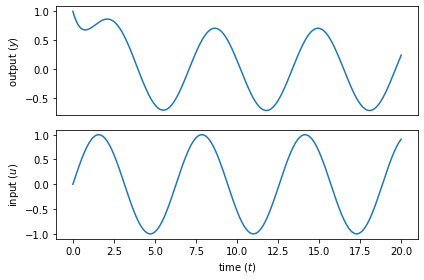

In [31]:
import numpy as np
import pylab as plt # pylab == matplotlib.pyplot

# DE parameters
a = 1.
b = 1.

# initial value, final time, timestep
y0 = 1.
t = 20.
dt = 1e-2

# time points -- multiples of dt from 0 to t
T = np.arange(0,t,dt)

# input
def u(s):
  return np.sin(s)

y = [y0] # output
for s in T[:-1]: # loop through times; exlude final time
  y.append(y[-1] + dt * (-a*y[-1] + b*u(s))) # DE
y = np.array(y)

plt.subplot(2,1,1)
plt.plot(T,y)
plt.ylabel(r'output ($y$)')
plt.xticks([]) # remove "ticks" on the x-axis

plt.subplot(2,1,2)
plt.plot(T,u(T))
plt.ylabel(r'input ($u$)')
plt.xlabel(r'time ($t$)')
plt.tight_layout() # adjusts sizes and locations

pass

a. With $u(s) = 0$, simulate the DE twice:  first with $y_1(0) = 1$ to obtain numerical simulation $\tilde{y}_1$ and second with $y_3(0) = 3$ to obtain numerical simulation $\tilde{y}_3$.  Show that $\tilde{y}_3 = 3 \tilde{y}_1$ by plotting $\tilde{y}_3$ and $3 \tilde{y}_1$ on the same axis using the following code snippet.

***Note:*** the code snippet below includes informative axis labels and a legend on the plot, and uses different a different line style / width for the second line to distinguish it from the first -- ***all plots you create in this course should have similarly informative labels (and legends, as applicable), and make use of different line styles / widths to distinguish lines.***  Unabeled or otherwise uninterpretable plots will not be graded for credit.


In [ ]:
# code for problem (a.) goes here

In [ ]:
# code snippet for plotting in problem (a.)
y1 = np.array(y1) # convert Python list y1 to NumPy array
plt.plot(T,3*y1,label=r'$y_1$') # label this line for inclusion in a legend
plt.plot(T,y1+y2,label=r'$y_1+y_2$',linestyle='--',linewidth=2) 
plt.plot(T,y3.real,label=r'$y_3$',linestyle='--',linewidth=2) 
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands

b. With $y(0) = 0$, simulate the DE three times:  first with $u_{\sin}(t) = \sin(t)$ to obtain simulation $\tilde{y}_{\sin}$, second with $u_{\cos}(t) = \cos(t)$ to obtain simulation $\tilde{y}_{\cos}$, and third with $u_{\sin+\cos}(t) = \sin(t) + \cos(t)$ to obtain solution $\tilde{y}_{\sin+\cos}$.  Show that $\tilde{y}_{\sin+\cos} = \tilde{y}_{\sin} + \tilde{y}_{\cos}$ by plotting $\tilde{y}_{\sin+\cos}$ and $\tilde{y}_{\sin} + \tilde{y}_{\cos}$ on the same axis.  Vary the line style/width and include a legend as in the previous problem to make it easy to visually distinguish the two lines.

In [ ]:
# code for problem (b.) goes here

c. Experiment with at least one of the following and describe how the simulation results change.
* Increase the timestep $\delta t$ to $0.1$, $1$, or larger.
* Change the value of $a$, keeping the sign the same.
* Change the sign of $a$, keeping the value the same.

In [ ]:
# code for problem (c.) goes here

d. Express $u_1(t) = \sin(t)$ and $u_2(t) = \cos(t)$ as complex exponentials.

e. Use the transfer function representation of the model specified by (DE) to determine the system's response to the two inputs in (d.) and create a plot to compare with your results from (b.).

***Where did the simulation script come from?*** If you're interested to understand where the script above came from, read the following explanation.

If the pair of signals $(u,y)$ are a solution to the differential equation from problem (4.), then they approximately solve the ***difference equation***

$$ \frac{1}{\delta t}(y(t + \delta t) - y(t)) + a y(t) \simeq b u(t); $$

this equation can be derived directly from the definition of the time derivative $\dot{y}$ of the signal $y$.  Rearranging this difference equation, we find the approximation

$$ \tilde{y}[t + \delta t] = \tilde{y}[t] + \delta t ( -a \tilde{y}[t] + b u[t] ). $$

This difference equation can be used to approximate solutions to the original differential equation as follows:
0. suppose initial value $y(0)$, input $u:\mathbb{R}\rightarrow\mathbb{R}$, final time $t > 0$, and timestep $\delta t > 0$ are given, and set $k = 0$, $\tilde{y}[0] = y(0)$;
1. set $\tilde{y}[(k+1)\cdot\delta t] = \tilde{y}[k\cdot\delta t] + \delta t ( -a \tilde{y}[k\cdot\delta t] + b u[k\cdot\delta t] )$;
2. set $k = k+1$;
3. if $k\cdot\delta t < t$, go back to step (1.), otherwise stop.

The sequence of values $\tilde{y}[k\cdot\delta t]$ for $k\in\mathbb{N}$ approximate the solution $y(k\cdot\delta t)$ of the original differential equation; when we implement this approximation on a computer, we call $\tilde{y}$ a ***numerical simulation*** of $y$.

Translating the algorithm specified by the pseudocode (0.)--(3.) to Python, we obtain the preceding script.